Step 1: Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
jan_df = pd.read_csv('/Users/tobyzhang/Desktop/idxexchange/data/CRMLSSold202501_filled.csv')
feb_df = pd.read_csv('/Users/tobyzhang/Desktop/idxexchange/data/CRMLSSold202502.csv')
mar_df = pd.read_csv('/Users/tobyzhang/Desktop/idxexchange/data/CRMLSSold202503.csv')
apr_df = pd.read_csv('/Users/tobyzhang/Desktop/idxexchange/data/CRMLSSold202504.csv')
may_df = pd.read_csv('/Users/tobyzhang/Desktop/idxexchange/data/CRMLSSold202505.csv')
dec_df = pd.read_csv('/Users/tobyzhang/Desktop/idxexchange/data/CRMLSSold202412.csv')


jan_df.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,PasadenaFoothills,PasadenaFoothills,NaN,True,NaN,NaN,NaN,699000.0,538489291,jimo@bridgeadvisorsllc.com,...,NaN,False,NaN,NaN,90031,0.0,34350.0,NaN,False,False
1,BeverlyHillsGreaterLa,BeverlyHillsGreaterLa,"Carpet,Stone,Tile,Wood",True,NaN,True,True,45000.0,509724017,mwoods@marybethwoods.com,...,NaN,False,NaN,NaN,90402,NaN,5717.0,NaN,False,False
2,PalmSprings,PalmSprings,Tile,True,NaN,NaN,True,8500.0,498101084,encorepremiergroup@bdhomes.com,...,NaN,False,3.0,NaN,92270,1.0,4792.0,NaN,False,False
3,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,100000.0,446933645,billquimby.re@gmail.com,...,NaN,False,NaN,NaN,92307,NaN,217800.0,NaN,False,False
4,PalmSprings,PalmSprings,"Carpet,Tile",True,NaN,NaN,True,7500.0,441682993,encorepremiergroup@bdhomes.com,...,NaN,False,3.0,NaN,92270,1103.0,5227.0,NaN,False,False


In [3]:
# Drop 'latfilled' and 'lonfilled' from 202501 dataset

jan_df = jan_df.drop(columns=['latfilled', 'lonfilled'], errors='ignore')


In [4]:
# Ensure consistent column names and data types

jan_df.columns = jan_df.columns.str.strip()
feb_df.columns = feb_df.columns.str.strip()
mar_df.columns = mar_df.columns.str.strip()
apr_df.columns = apr_df.columns.str.strip()
may_df.columns = may_df.columns.str.strip()
dec_df.columns = dec_df.columns.str.strip()

In [5]:
# Combine datasets

df_combined = pd.concat([jan_df, feb_df, mar_df, apr_df, may_df, dec_df], ignore_index=True)

In [6]:
# Filter for Residential and SingleFamilyResidence

df_filtered = df_combined[
    (df_combined['PropertyType'] == 'Residential') &
    (df_combined['PropertySubType'] == 'SingleFamilyResidence')
]

In [7]:
print(f"Filtered dataset shape: {df_filtered.shape}")

df_filtered.head()


Filtered dataset shape: (61886, 78)


,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,LotSizeDimensions,LotSizeArea,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict
11,SanDiego,SanDiego,"Carpet,Tile",False,NaN,NaN,False,530000.0,1104130366,tom@structuresd.com,...,NaN,13800.0,NaN,False,0.0,NaN,92021,NaN,13800.0,NaN
12,SanDiego,SanDiego,NaN,False,NaN,NaN,False,700000.0,1104128744,chadtrower@gmail.com,...,NaN,3000.0,NaN,False,0.0,NaN,92124,170.0,3000.0,NaN
13,SanDiego,SanDiego,"Carpet,Tile",False,NaN,NaN,False,1680000.0,1104128653,lisa@premiercoastalrealty.com,...,NaN,NaN,NaN,False,2.0,NaN,92130,26.0,NaN,NaN
14,CaliforniaDesert,CaliforniaDesert,Tile,True,NaN,NaN,True,1195000.0,1104128077,lisa@traditionproperties.net,...,NaN,11761.0,NaN,False,3.0,NaN,92253,275.0,11761.0,NaN
16,BeverlyHillsGreaterLa,BeverlyHillsGreaterLa,NaN,True,NaN,NaN,NaN,3800000.0,1104126716,Djacobson.re@gmail.com,...,NaN,15365.0,NaN,False,NaN,NaN,91423,NaN,15365.0,NaN


In [8]:
features = [
    'ClosePrice', 'LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger',
    'LotSizeAcres', 'YearBuilt', 'FireplacesTotal', 'ParkingTotal',
    'GarageSpaces', 'Stories', 'AssociationFee', 'DaysOnMarket',
    'Latitude', 'Longitude', 'City', 'CountyOrParish', 'PostalCode'
]

df_analysis = df_filtered[features].copy()


In [9]:
# Data Cleaning
# Handle missing values
missing_summary = df_analysis.isnull().sum()
print("\nMissing Values:\n", missing_summary[missing_summary > 0])


Missing Values:
 ClosePrice                   1
LivingArea                  36
BathroomsTotalInteger        9
LotSizeAcres              1127
YearBuilt                   57
FireplacesTotal          61886
GarageSpaces              2341
Stories                   7583
AssociationFee           18302
Latitude                     4
Longitude                    4
City                        57
dtype: int64


In [10]:
print(f"Shape of df_analysis: {df_analysis.shape}")

Shape of df_analysis: (61886, 17)


In [11]:
# Convert numeric columns, handling non-numeric values
numeric_cols = [
    'ClosePrice', 'LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger',
    'LotSizeAcres', 'YearBuilt', 'FireplacesTotal', 'ParkingTotal',
    'GarageSpaces', 'Stories', 'AssociationFee', 'DaysOnMarket',
    'Latitude', 'Longitude'
]

for col in numeric_cols:
    df_analysis[col] = df_analysis[col].replace(['N/A', 'Unknown', 'TBD', ''], np.nan)
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce', downcast='float')

In [12]:
# Fill missing numeric values with median
for col in numeric_cols:
    if df_analysis[col].isnull().sum() > 0:
        df_analysis[col].fillna(df_analysis[col].median(), inplace=True)


In [13]:
categorical_cols = ['City', 'CountyOrParish', 'PostalCode']


for col in categorical_cols:
    if df_analysis[col].isnull().sum() > 0:
        df_analysis[col].fillna(df_analysis[col].mode()[0], inplace=True)

# Remove outliers using IQR method for key numeric features
features_to_clean = ['ClosePrice', 'LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger', 'LotSizeAcres', 'YearBuilt']

for feature in features_to_clean:
    Q1 = df_analysis[feature].quantile(0.25)
    Q3 = df_analysis[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    initial_rows = df_analysis.shape[0]
    df_analysis = df_analysis[
        (df_analysis[feature] >= lower_bound) &
        (df_analysis[feature] <= upper_bound)
    ]
    print(f"Removed {initial_rows - df_analysis.shape[0]} outliers from {feature}")

print(f"Dataset shape after outlier removal: {df_analysis.shape}")


print("\nSummary Statistics:\n", df_analysis.describe())

Removed 4627 outliers from ClosePrice
Removed 1564 outliers from LivingArea
Removed 985 outliers from BedroomsTotal
Removed 579 outliers from BathroomsTotalInteger
Removed 6515 outliers from LotSizeAcres
Removed 53 outliers from YearBuilt
Dataset shape after outlier removal: (47563, 17)

Summary Statistics:
          ClosePrice    LivingArea  BedroomsTotal  BathroomsTotalInteger  \
count  4.756300e+04  47563.000000   47563.000000           47563.000000   
mean   9.664656e+05   1769.058472       3.333305               2.353720   
std    4.997074e+05    599.902466       0.790944               0.737931   
min    1.600000e+04      0.000000       2.000000               1.000000   
25%    6.069750e+05   1316.000000       3.000000               2.000000   
50%    8.350000e+05   1671.000000       3.000000               2.000000   
75%    1.225000e+06   2138.000000       4.000000               3.000000   
max    2.650000e+06   3686.000000       5.000000               4.000000   

       LotSize

In [14]:
print(f"Dataset shape after outlier removal: {df_analysis.shape}")


Dataset shape after outlier removal: (47563, 17)


In [15]:
print("\nSummary Statistics:\n", df_analysis.describe())



Summary Statistics:
          ClosePrice    LivingArea  BedroomsTotal  BathroomsTotalInteger  \
count  4.756300e+04  47563.000000   47563.000000           47563.000000   
mean   9.664656e+05   1769.058472       3.333305               2.353720   
std    4.997074e+05    599.902466       0.790944               0.737931   
min    1.600000e+04      0.000000       2.000000               1.000000   
25%    6.069750e+05   1316.000000       3.000000               2.000000   
50%    8.350000e+05   1671.000000       3.000000               2.000000   
75%    1.225000e+06   2138.000000       4.000000               3.000000   
max    2.650000e+06   3686.000000       5.000000               4.000000   

       LotSizeAcres     YearBuilt  FireplacesTotal  ParkingTotal  \
count  47563.000000  47563.000000              0.0  47563.000000   
mean       0.159182   1974.204468              NaN      2.876459   
std        0.057519     27.459684              NaN     72.322052   
min        0.000000   1895.000

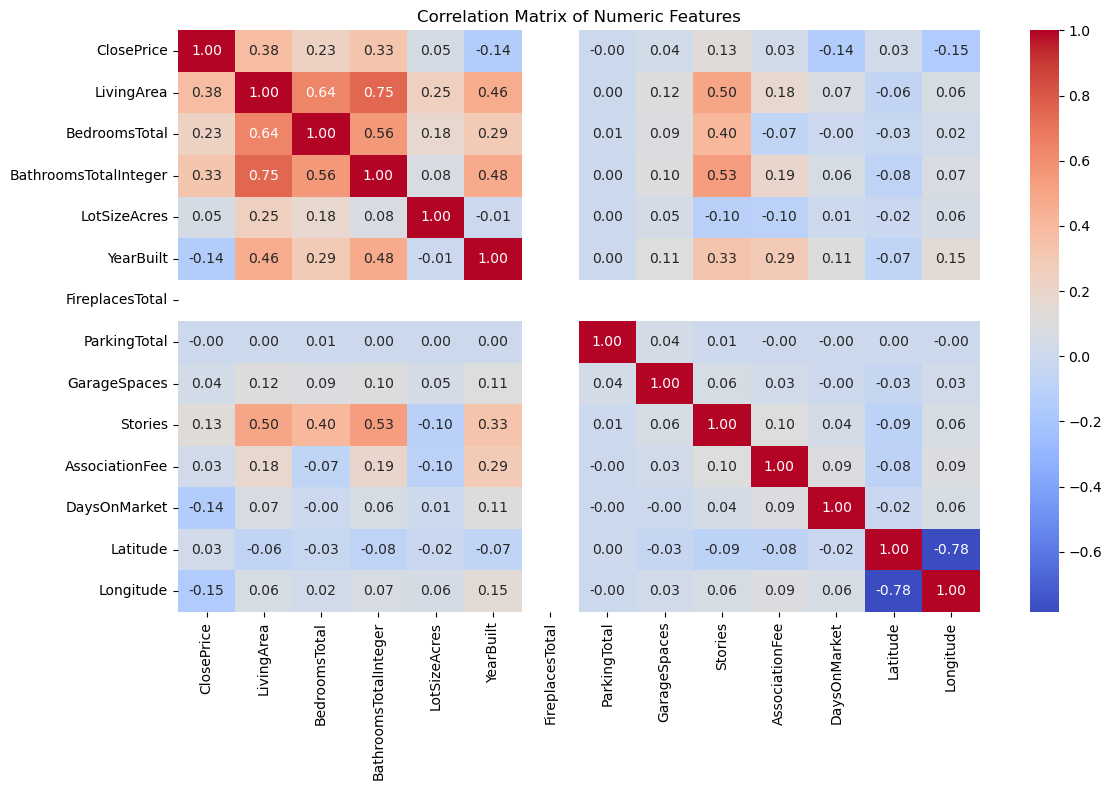

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_analysis[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

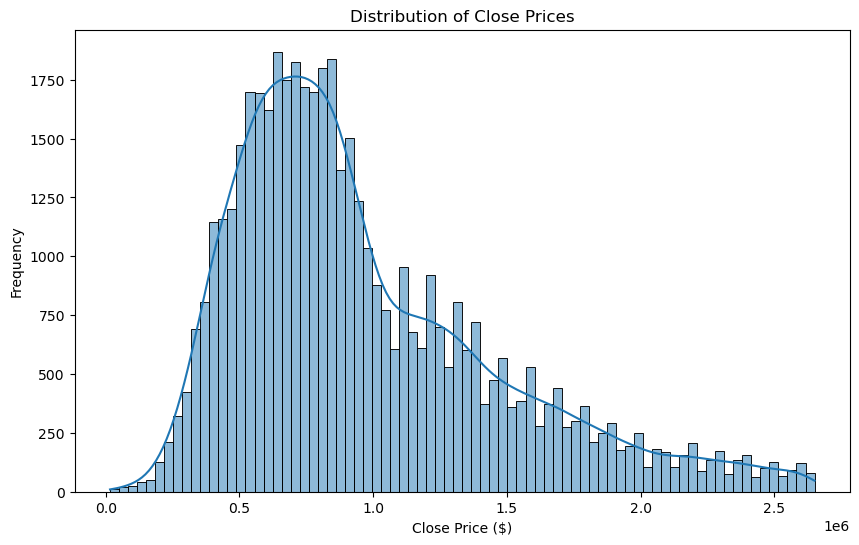

In [17]:
# Distribution of ClosePrice
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['ClosePrice'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price ($)')
plt.ylabel('Frequency')
plt.show()

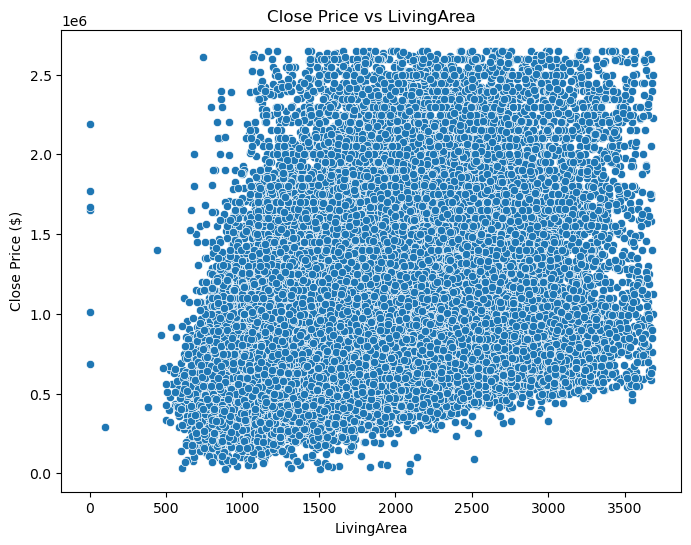

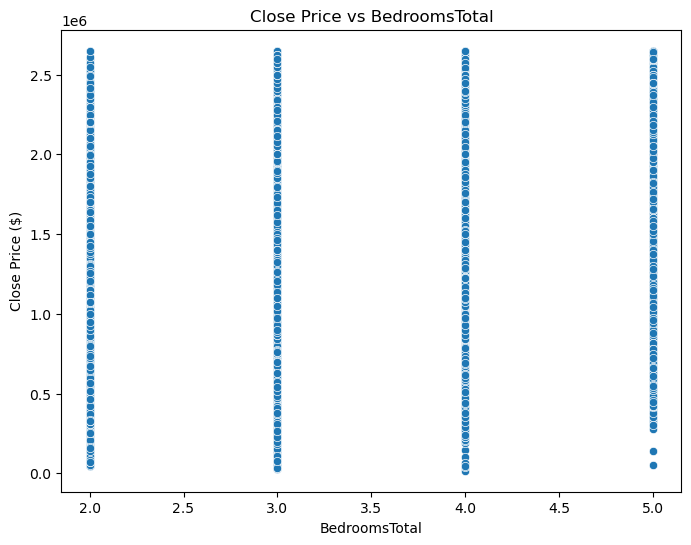

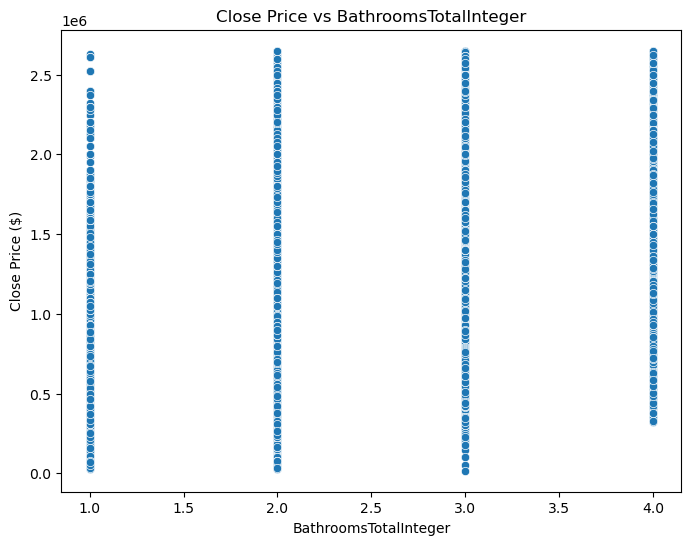

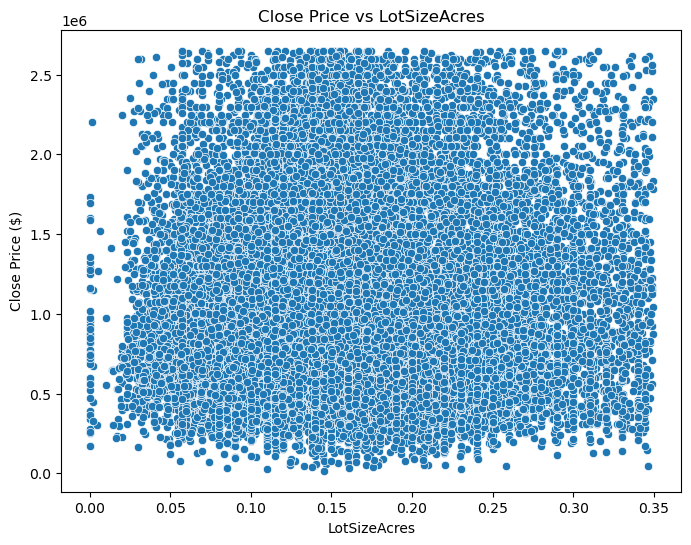

In [18]:
# Scatter plots for key features vs ClosePrice
key_features = ['LivingArea', 'BedroomsTotal', 'BathroomsTotalInteger', 'LotSizeAcres']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_analysis[feature], y=df_analysis['ClosePrice'])
    plt.title(f'Close Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Close Price ($)')
    plt.show()

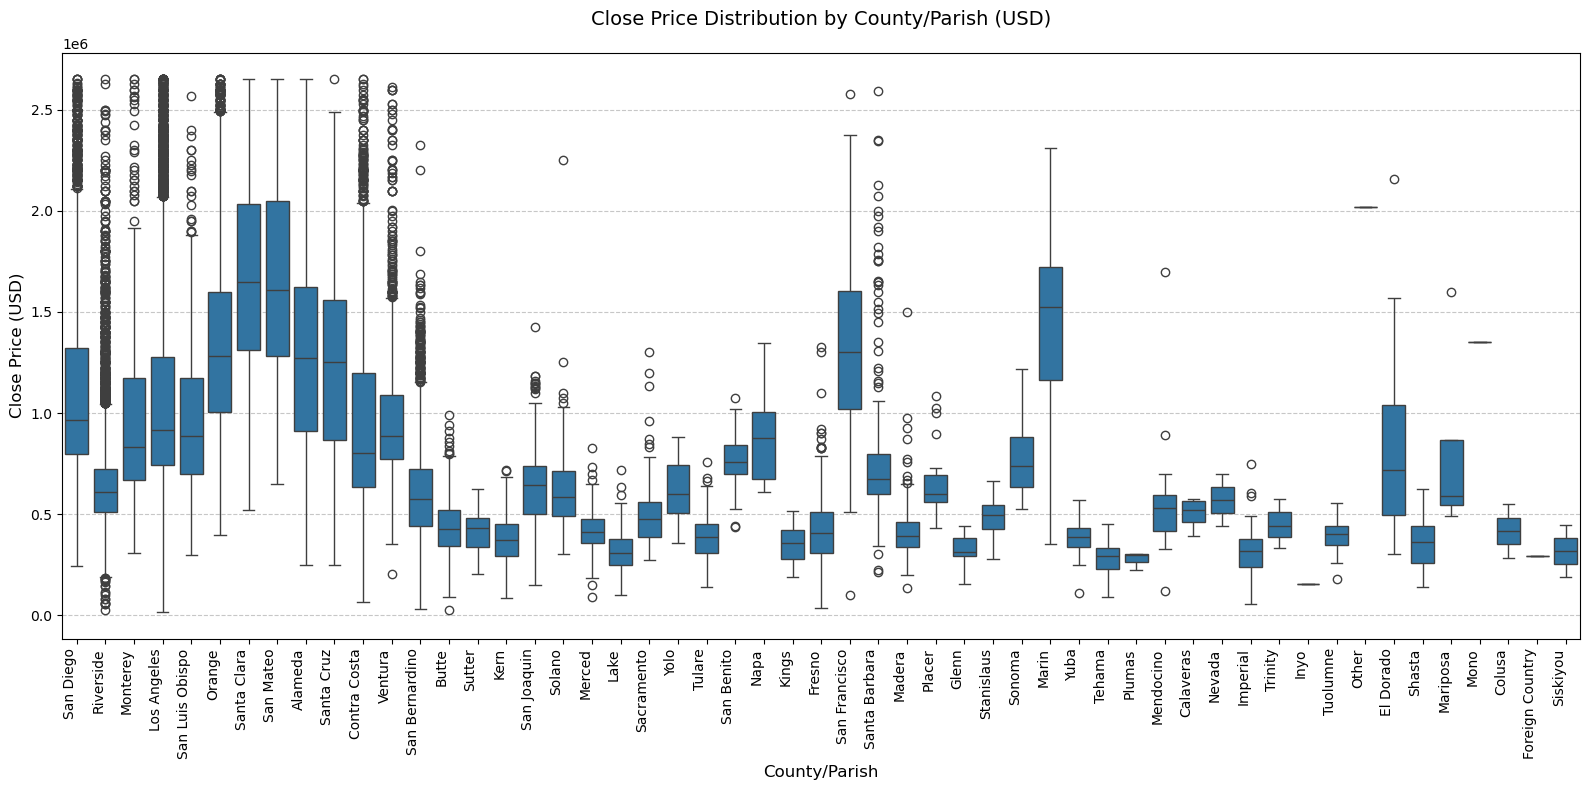

In [24]:
# Box plot for ClosePrice by CountyOrParish
plt.figure(figsize=(16, 8))  
sns.boxplot(x="CountyOrParish", y="ClosePrice", data=df_analysis)
plt.title('Close Price Distribution by County/Parish (USD)', fontsize=14, pad=20)  
plt.xlabel('County/Parish', fontsize=12) 
plt.ylabel('Close Price (USD)', fontsize=12)  
plt.xticks(rotation=90, ha='right', fontsize=10)  
plt.yticks(fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [28]:
# Step 2: Model Preparation and Training (XGBoost)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost.callback import EarlyStopping


# Prepare data for modeling
# One-hot encode categorical features
df_model = pd.get_dummies(df_analysis, columns=['City', 'CountyOrParish', 'PostalCode'], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop('ClosePrice', axis=1)
y = df_model['ClosePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (38050, 2245)
Testing set shape: (9513, 2245)


In [31]:
# Train XGBoost model
print("Training XGBoost model...")

# First, add the missing imports
from sklearn.metrics import r2_score, mean_absolute_error

xg_reg = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model using original variables
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy_percentage = 100 - mape
print(f"MAPE: {mape:.2f}%")
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

# Create feature importance dataframe for visualization
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xg_reg.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(importance_df.head(10))

Training XGBoost model...
XGBoost Model Performance:
R² Score: 0.8436
RMSE: $199,505.94
MAE: $136,209.61
MAPE: 15.20%
Model Accuracy: 84.80%

Top 10 Most Important Features:
                           feature  importance
774       CountyOrParish_San Diego    0.097129
770       CountyOrParish_Riverside    0.067019
780     CountyOrParish_Santa Clara    0.053674
773  CountyOrParish_San Bernardino    0.053553
766          CountyOrParish_Orange    0.023435
778       CountyOrParish_San Mateo    0.023299
756     CountyOrParish_Los Angeles    0.022939
453                 City_Oceanside    0.014433
360               City_Los Angeles    0.014081
11                        Latitude    0.013964


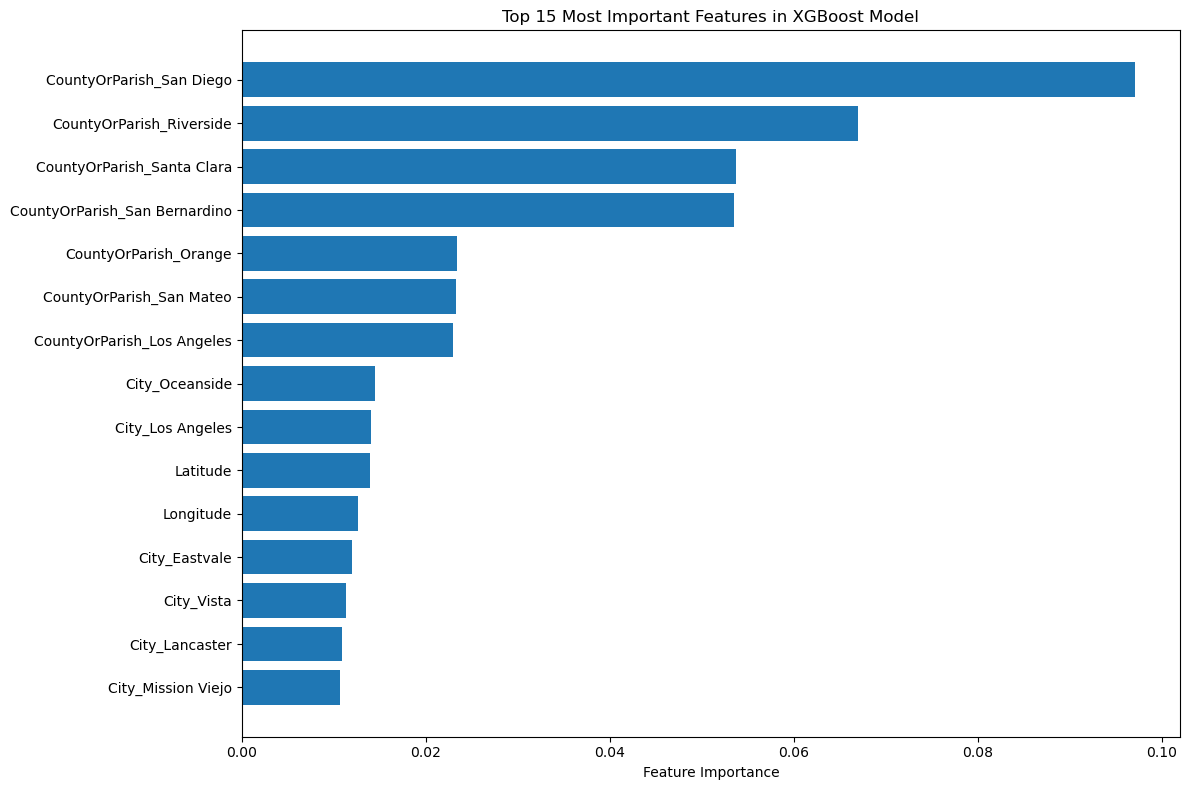

In [32]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)  # Show top 15 features
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features in XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to show most important at top
plt.tight_layout()
plt.show()

In [33]:
# Try multiple models 
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor



In [34]:
# Check for missing values in the training data
print("Missing values in X_train:")
print(X_train.isnull().sum().sum())
print("\nMissing values in y_train:")
print(y_train.isnull().sum())

# Check for infinite values
print("\nInfinite values in X_train:")
print(np.isinf(X_train).sum().sum())
print("\nInfinite values in y_train:")
print(np.isinf(y_train).sum())

# More robust data cleaning approach
from sklearn.impute import SimpleImputer

# Check which columns have issues
print("\nColumns with missing values:")
missing_cols = X_train.columns[X_train.isnull().any()]
print(f"Number of columns with missing values: {len(missing_cols)}")

# Check for columns that are all NaN
all_nan_cols = X_train.columns[X_train.isnull().all()]
print(f"Columns that are all NaN: {list(all_nan_cols)}")

# Remove columns that are all NaN
X_train_filtered = X_train.drop(columns=all_nan_cols)
X_test_filtered = X_test.drop(columns=all_nan_cols)

# Replace infinite values with NaN first
X_train_filtered = X_train_filtered.replace([np.inf, -np.inf], np.nan)
X_test_filtered = X_test_filtered.replace([np.inf, -np.inf], np.nan)

# Handle missing values in features
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train_filtered)
X_test_imputed = imputer.transform(X_test_filtered)

# Convert back to DataFrame with proper column names
X_train_clean = pd.DataFrame(X_train_imputed, columns=X_train_filtered.columns, index=X_train_filtered.index)
X_test_clean = pd.DataFrame(X_test_imputed, columns=X_train_filtered.columns, index=X_test_filtered.index)

# Handle missing values in target
y_train_clean = y_train.fillna(y_train.median())
y_test_clean = y_test.fillna(y_test.median())

print(f"\nCleaned training data shape: {X_train_clean.shape}")
print(f"Missing values after cleaning: {X_train_clean.isnull().sum().sum()}")
print(f"Infinite values after cleaning: {np.isinf(X_train_clean).sum().sum()}")

# Test Ridge regression with cleaned data
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_clean, y_train_clean)
ridge_r2 = ridge_model.score(X_test_clean, y_test_clean)
print(f"Ridge R²: {ridge_r2:.4f}")

Missing values in X_train:
38050

Missing values in y_train:
0

Infinite values in X_train:
0

Infinite values in y_train:
0

Columns with missing values:
Number of columns with missing values: 1
Columns that are all NaN: ['FireplacesTotal']

Cleaned training data shape: (38050, 2244)
Missing values after cleaning: 0
Infinite values after cleaning: 0
Ridge R²: 0.8619


In [35]:


# Test Random Forest with faster settings for initial testing
print("\nTraining Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=50,  # Reduced from 100 for faster training
    max_depth=10,     # Limit depth to prevent overfitting and speed up
    random_state=42,
    n_jobs=-1         # Use all available cores
)
rf_model.fit(X_train_clean, y_train_clean)
rf_r2 = rf_model.score(X_test_clean, y_test_clean)
print(f"Random Forest R²: {rf_r2:.4f}")

# Make predictions for evaluation
print("\nGenerating predictions...")
ridge_pred = ridge_model.predict(X_test_clean)
rf_pred = rf_model.predict(X_test_clean)

print("\nRidge Regression Metrics:")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test_clean, ridge_pred)):,.2f}")
print(f"MAE: ${mean_absolute_error(y_test_clean, ridge_pred):,.2f}")

print("\nRandom Forest Metrics:")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test_clean, rf_pred)):,.2f}")
print(f"MAE: ${mean_absolute_error(y_test_clean, rf_pred):,.2f}")

# Try XGBoost as well since it often performs well on this type of data
print("\nTraining XGBoost...")
xg_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xg_model.fit(X_train_clean, y_train_clean)
xg_r2 = xg_model.score(X_test_clean, y_test_clean)
xg_pred = xg_model.predict(X_test_clean)

print(f"XGBoost R²: {xg_r2:.4f}")
print(f"XGBoost RMSE: ${np.sqrt(mean_squared_error(y_test_clean, xg_pred)):,.2f}")
print(f"XGBoost MAE: ${mean_absolute_error(y_test_clean, xg_pred):,.2f}")

# Model comparison summary
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"Ridge Regression R²:    {ridge_r2:.4f}")
print(f"Random Forest R²:       {rf_r2:.4f}")
print(f"XGBoost R²:             {xg_r2:.4f}")
print("="*50)


Training Random Forest...
Random Forest R²: 0.8014

Generating predictions...

Ridge Regression Metrics:
RMSE: $187,503.89
MAE: $129,317.99

Random Forest Metrics:
RMSE: $224,846.93
MAE: $151,872.29

Training XGBoost...
XGBoost R²: 0.8364
XGBoost RMSE: $204,098.07
XGBoost MAE: $138,985.64

MODEL PERFORMANCE SUMMARY
Ridge Regression R²:    0.8619
Random Forest R²:       0.8014
XGBoost R²:             0.8364


In [38]:
 #Neural Network Implementation with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Prepare data for neural network (needs standardization)
print("\nPreparing data for neural network...")

# Standardize the features for neural network
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers and transform data
X_train_scaled = scaler_X.fit_transform(X_train_clean)
X_test_scaled = scaler_X.transform(X_test_clean)

# Scale target variable (helps with training stability)
y_train_scaled = scaler_y.fit_transform(y_train_clean.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test_clean.values.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.FloatTensor(y_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.FloatTensor(y_test_scaled).to(device)

print(f"Training tensor shape: {X_train_tensor.shape}")
print(f"Test tensor shape: {X_test_tensor.shape}")


Using device: cpu

Preparing data for neural network...
Training tensor shape: torch.Size([38050, 2244])
Test tensor shape: torch.Size([9513, 2244])


In [39]:
# Define Neural Network Architecture
class HousePriceNN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[512, 256, 128, 64], dropout_rate=0.3):
        super(HousePriceNN, self).__init__()
        
        # Create layers list
        layers = []
        
        # Input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(hidden_sizes[0]))
        layers.append(nn.Dropout(dropout_rate))
        
        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_sizes[i + 1]))
            layers.append(nn.Dropout(dropout_rate))
        
        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], 1))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Initialize model
input_size = X_train_tensor.shape[1]
model = HousePriceNN(input_size).to(device)

print(f"\nModel architecture:")
print(model)
print(f"\nNumber of parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")



Model architecture:
HousePriceNN(
  (network): Sequential(
    (0): Linear(in_features=2244, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=64, out_features=1, bias=True)
  )
)

Number of parameters: 1,323,905


In [40]:
# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

# Create data loaders
batch_size = 256
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training function
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=100):
    model.train()
    train_losses = []
    
    print("Starting training...")
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        # Learning rate scheduling
        scheduler.step(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')
    
    return train_losses

# Train the model
print("\nTraining Neural Network...")
train_losses = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50)



Training Neural Network...
Starting training...
Epoch [10/50], Loss: 0.140143
Epoch [20/50], Loss: 0.128093
Epoch [30/50], Loss: 0.120339
Epoch [40/50], Loss: 0.114899
Epoch [50/50], Loss: 0.107319


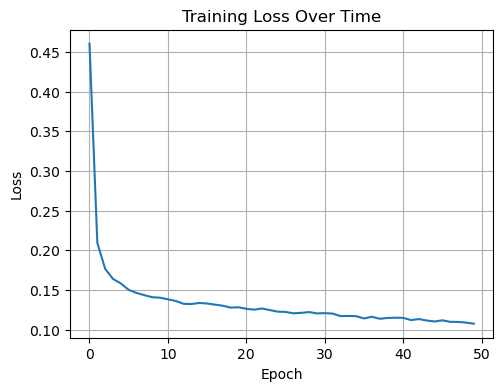

In [41]:
# Plot training loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

In [44]:
# Evaluation function
def evaluate_model(model, X_test, y_test, scaler_y):
    model.eval()
    with torch.no_grad():
        predictions_scaled = model(X_test).squeeze()
        
        # Convert back to original scale
        predictions_original = scaler_y.inverse_transform(predictions_scaled.cpu().numpy().reshape(-1, 1)).flatten()
        actual_original = scaler_y.inverse_transform(y_test.cpu().numpy().reshape(-1, 1)).flatten()
        
        # Calculate metrics
        mse = mean_squared_error(actual_original, predictions_original)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual_original, predictions_original)
        r2 = r2_score(actual_original, predictions_original)
        
        return predictions_original, actual_original, {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Evaluate the model
print("\nEvaluating Neural Network...")
nn_pred, nn_actual, nn_metrics = evaluate_model(model, X_test_tensor, y_test_tensor, scaler_y)

# Print results
print("\nNeural Network Results:")
print(f"R² Score: {nn_metrics['R²']:.4f}")
print(f"RMSE: ${nn_metrics['RMSE']:,.2f}")
print(f"MAE: ${nn_metrics['MAE']:,.2f}")


Evaluating Neural Network...

Neural Network Results:
R² Score: 0.8779
RMSE: $176,312.27
MAE: $110,620.76


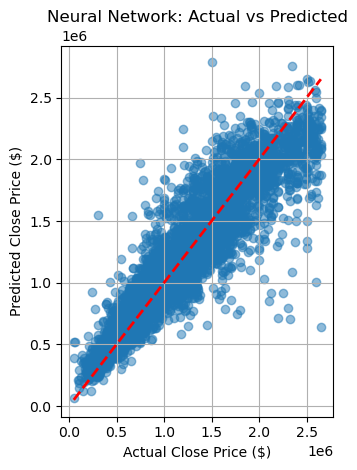

In [45]:
# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(nn_actual, nn_pred, alpha=0.5)
plt.plot([nn_actual.min(), nn_actual.max()], [nn_actual.min(), nn_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Close Price ($)')
plt.ylabel('Predicted Close Price ($)')
plt.title('Neural Network: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# Compare all models
print("\n" + "="*60)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*60)
print(f"Ridge Regression R²:    {ridge_r2:.4f}")
print(f"Random Forest R²:       {rf_r2:.4f}")
print(f"XGBoost R²:             {xg_r2:.4f}")
print(f"Neural Network R²:      {nn_metrics['R²']:.4f}")
print("="*60)

# Calculate MAPE for neural network
mape_nn = np.mean(np.abs((nn_actual - nn_pred) / nn_actual)) * 100
print(f"\nNeural Network MAPE: {mape_nn:.2f}%")
print(f"Neural Network Accuracy: {100 - mape_nn:.2f}%")


COMPREHENSIVE MODEL COMPARISON
Ridge Regression R²:    0.8619
Random Forest R²:       0.8014
XGBoost R²:             0.8364
Neural Network R²:      0.8779

Neural Network MAPE: 11.66%
Neural Network Accuracy: 88.34%


In [47]:
# Feature importance approximation for neural network (using gradients)
def get_feature_importance_nn(model, X_sample, feature_names):
    model.eval()
    X_sample.requires_grad_(True)
    
    output = model(X_sample)
    output.backward(torch.ones_like(output))
    
    importance = torch.abs(X_sample.grad).mean(dim=0).cpu().numpy()
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    return importance_df

# Get feature importance for neural network
print("\nCalculating Neural Network Feature Importance...")
sample_size = min(1000, X_test_tensor.shape[0])
sample_indices = torch.randperm(X_test_tensor.shape[0])[:sample_size]
X_sample = X_test_tensor[sample_indices].clone()

nn_importance = get_feature_importance_nn(model, X_sample, X_train_clean.columns)

print("\nTop 10 Most Important Features (Neural Network):")
print(nn_importance.head(10))



Calculating Neural Network Feature Importance...

Top 10 Most Important Features (Neural Network):
                           feature  importance
0                       LivingArea    0.244785
3                     LotSizeAcres    0.085044
2            BathroomsTotalInteger    0.069746
6                     GarageSpaces    0.067490
769       CountyOrParish_Riverside    0.057744
4                        YearBuilt    0.054557
9                     DaysOnMarket    0.047039
772  CountyOrParish_San Bernardino    0.043284
334                 City_Lancaster    0.031979
779     CountyOrParish_Santa Clara    0.029720


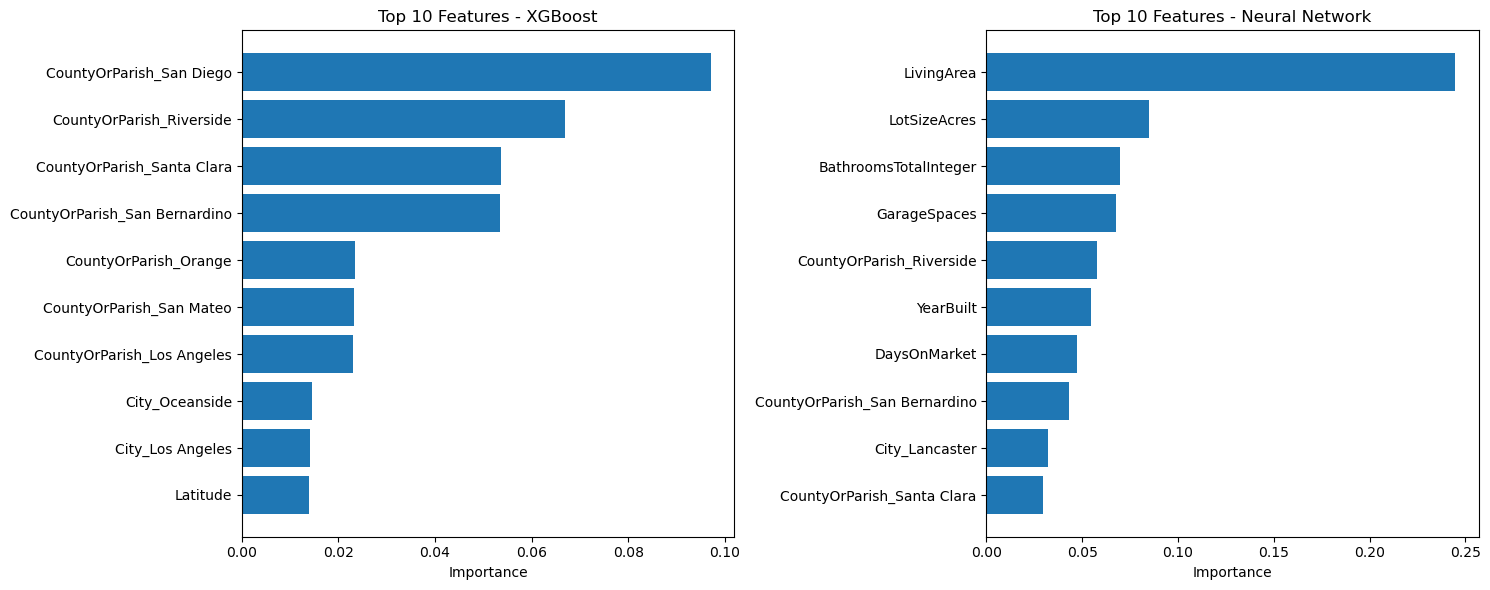

In [48]:
# Visualize feature importance comparison
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top_xgb = importance_df.head(10)
plt.barh(range(len(top_xgb)), top_xgb['importance'])
plt.yticks(range(len(top_xgb)), top_xgb['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Features - XGBoost')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_nn = nn_importance.head(10)
plt.barh(range(len(top_nn)), top_nn['importance'])
plt.yticks(range(len(top_nn)), top_nn['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Features - Neural Network')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()